In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [22]:
init_df = pd.read_csv('final_data.csv')

In [13]:
df = init_df
df[['GC%','adhesion','encapsidation', 'assembly','polyprotein']]
df.drop(columns=['Species','GC%','adhesion','encapsidation','assembly','polyprotein'], inplace=True)
df.dropna(inplace=True)
df.isna().sum()

virulence_score    0
dtype: int64

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

C:\Users\hbalcera\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


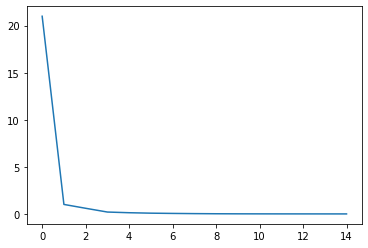

In [15]:
model = KMeans(n_clusters=8, n_init=15, random_state=42)
model.fit(df_scaled)
cluster_labels = model.predict(df_scaled)   

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [16]:
for seed in list(np.arange(2,105,7)):
    kmeans = KMeans(n_clusters=3, random_state=seed)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)   
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    calinski = metrics.calinski_harabasz_score(df_scaled, cluster_labels)
    davies = davies_bouldin_score(df_scaled, cluster_labels)
    print("For seed={0}, the silhouette is {1}, calinski is {2}, and davies is {3}".format(seed, silhouette_avg, calinski, davies))

For seed=2, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=9, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=16, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=23, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=30, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=37, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=44, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=51, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For seed=58, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davie

In [17]:
for cluster in list(np.arange(2,15)):
    kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=15)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)   
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    calinski = metrics.calinski_harabasz_score(df_scaled, cluster_labels)
    davies = davies_bouldin_score(df_scaled, cluster_labels)
    print("For cluster={0}, the silhouette is {1}, calinski is {2}, and davies is {3}".format(cluster, silhouette_avg, calinski, davies))

For cluster=2, the silhouette is 0.8653694834912478, calinski is 376.3441046441771, and davies is 0.18300201390370419
For cluster=3, the silhouette is 0.6839271125145204, calinski is 305.920857294572, and davies is 0.3693071136943913
For cluster=4, the silhouette is 0.6567468009542997, calinski is 587.6274725269873, and davies is 0.38743097816079397
For cluster=5, the silhouette is 0.6050117599646987, calinski is 651.3275186397249, and davies is 0.45659312576076105
For cluster=6, the silhouette is 0.5700046510134837, calinski is 778.7503394879694, and davies is 0.38049205025553245
For cluster=7, the silhouette is 0.5329619368027391, calinski is 903.1070212545294, and davies is 0.3601602244545795
For cluster=8, the silhouette is 0.6158697570384054, calinski is 1170.8677495096467, and davies is 0.3175412894295182
For cluster=9, the silhouette is 0.5559299088676511, calinski is 1686.527560879112, and davies is 0.2539225749359819
For cluster=10, the silhouette is 0.5873928811565219, calins

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=15)
kmeans.fit(df_scaled)
cluster_labels = kmeans.predict(df_scaled)   
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
calinski = metrics.calinski_harabasz_score(df_scaled, cluster_labels)
davies = davies_bouldin_score(df_scaled, cluster_labels)

c_df = init_df
c_df['Cluster_Labels'] = cluster_labels
c_df['Cluster_Labels'].value_counts()

2    8
1    6
0    5
3    2
Name: Cluster_Labels, dtype: int64

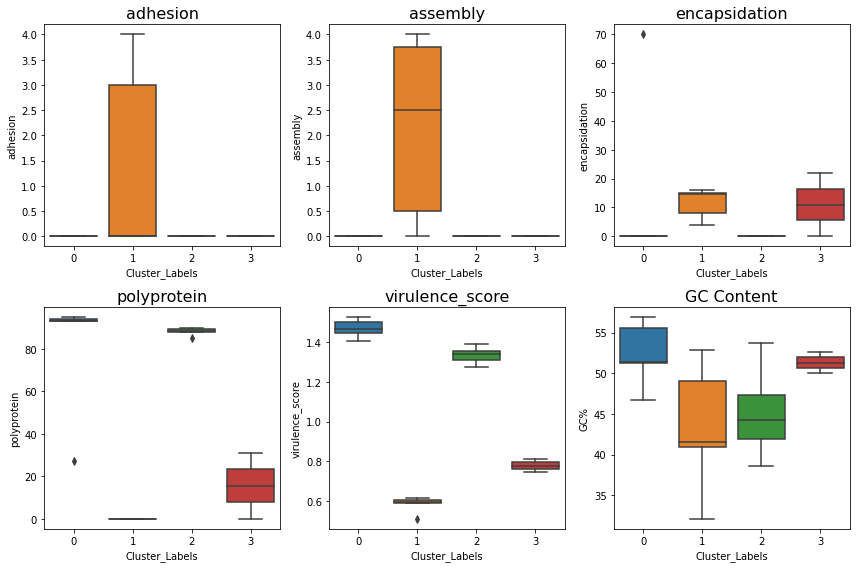

In [26]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="adhesion", data=c_df, ax=axes[0,0])
axes[0,0].set_title("adhesion", fontsize=16)

sns.boxplot(x='Cluster_Labels', y='assembly', data=c_df, ax=axes[0,1])
axes[0,1].set_title("assembly", fontsize=16)

sns.boxplot(x='Cluster_Labels', y='encapsidation', data=c_df, ax=axes[0,2])
axes[0,2].set_title("encapsidation", fontsize=16)

sns.boxplot(x='Cluster_Labels', y='polyprotein',data=c_df, ax=axes[1,0])
axes[1,0].set_title("polyprotein", fontsize=16)

sns.boxplot(x='Cluster_Labels', y='virulence_score', data=c_df, ax=axes[1,1])
axes[1,1].set_title("virulence_score", fontsize=16)

sns.boxplot(x='Cluster_Labels', y='GC%', data=c_df, ax=axes[1,2])
axes[1,2].set_title("GC Content", fontsize=16)


plt.tight_layout()
plt.show();

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df1)

df_minmax = pd.DataFrame(df_minmax, index=df1.index, columns=df1.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,GC%,adhesion,encapsidation,assembly,polyprotein
0,0,0.816935,0.000000,0.200000,0.000000,0.846316
1,1,0.454435,0.333333,0.166667,0.541667,0.000000
2,2,0.510837,0.000000,0.000000,0.000000,0.930263
3,3,0.774597,0.000000,0.157143,0.000000,0.163158


In [28]:
from math import pi
def make_spider(row, title, color):
 
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=8)
 
    ax.set_rlabel_position(0)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
 

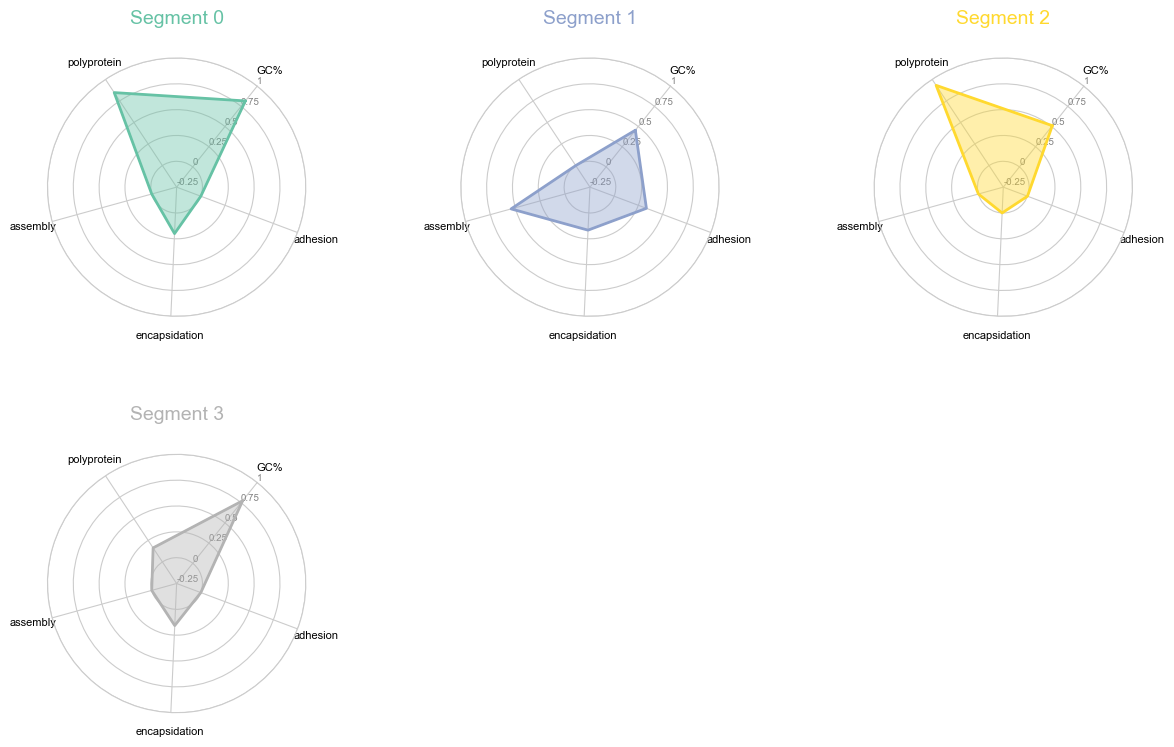

In [83]:
my_dpi=100
figz=plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5,wspace=0.6)
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))
figz.patch.set_facecolor('white')

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))
    
plt.savefig('Spiders.png', transparent=False)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [12.5, 12.5, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [23.75, 23.75, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [80.0, 80.0, 120.0, 120.0],
  [36.875, 36.875, 100.0, 100.0]],
 'dcoord': [[0.0, 2.220446049250313e-16, 2.220446049250313e-16, 0.0],
  [0.0, 0.06105650493984921, 0.06105650493984921, 2.220446049250313e-16],
  [0.06105650493984921, 0.23672785248608239, 0.23672785248608239, 0.0],
  [0.0, 0.17085109715624525, 0.17085109715624525, 0.0],
  [0.23672785248608239,
   0.5969076732935266,
   0.5969076732935266,
   0.17085109715624525],
  [0.0, 0.15063282468712824, 0.15063282468712824, 0.0],
  [0.0, 0.06962583896649432, 0.06962583896649432, 0.0],
  [0.15063282468712824,
   0.23197455001817746,
   0.23197455001817746,
   0.06962583896649432],
  [0.0, 0.08368490260395992, 

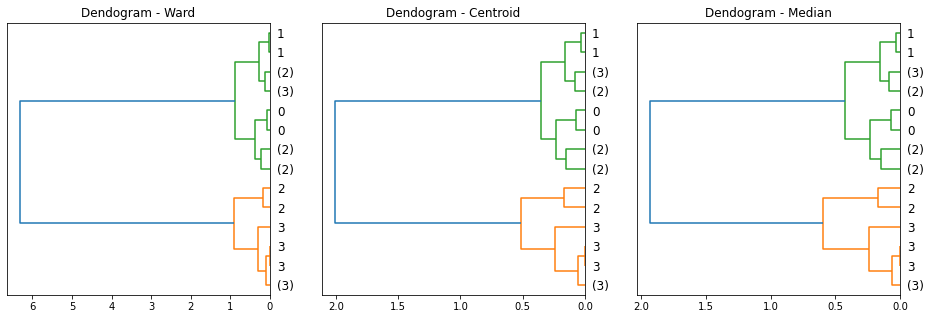

In [30]:
plt.figure(1, figsize=(16, 5))
fig.suptitle('Dendrogram Diff Methods', fontsize=16,)
plt.axis('equal')
plt.grid(True)

plt.subplot(1,3,1)
plt.title('Dendogram - Ward')
mergings_w = linkage(df_scaled, method="ward", metric='euclidean',optimal_ordering=True)
tree_labels_ward = cut_tree(mergings_w, n_clusters=4).reshape(-1)
dendrogram(mergings_w, p=3, truncate_mode="level",orientation='left',distance_sort='descending', labels=tree_labels_ward)

plt.subplot(1,3,2)
plt.title('Dendogram - Centroid')
mergings_c = linkage(df_scaled, method="centroid", metric='euclidean',optimal_ordering=True)
tree_labels_centroid = cut_tree(mergings_c, n_clusters=4).reshape(-1)
dendrogram(mergings_c, p=3, truncate_mode="level",orientation='left',distance_sort='descending', labels=tree_labels_centroid)


plt.subplot(1,3,3)
plt.title('Dendogram - Median')
mergings_m = linkage(df_scaled, method="median", metric='euclidean',optimal_ordering=True)
tree_labels_median = cut_tree(mergings_m, n_clusters=4).reshape(-1)
dendrogram(mergings_m, p=3, truncate_mode="level",orientation='left',distance_sort='descending', labels=tree_labels_median)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

pcadf = pd.concat([principalDf, df['Cluster_Labels']], axis = 1)

In [ ]:
plt.scatter(pcadf.iloc[:, 0], pcadf.iloc[:, 1],
            c=pcadf['Cluster_Labels'])

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [49]:
hosts = pd.read_csv('Hosts.csv')
hosts = hosts.groupby(hosts['Species'], as_index=False)['Host'].apply(','.join)

In [53]:
clustered = pd.merge(init_df[['Species','Cluster_Labels']], hosts[['Species','Host']], how='inner', on='Species')
clustered.set_index('Species', drop=True, inplace=True)
clustered.to_csv('clusters.csv')

C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 3600x2400 with 0 Axes>

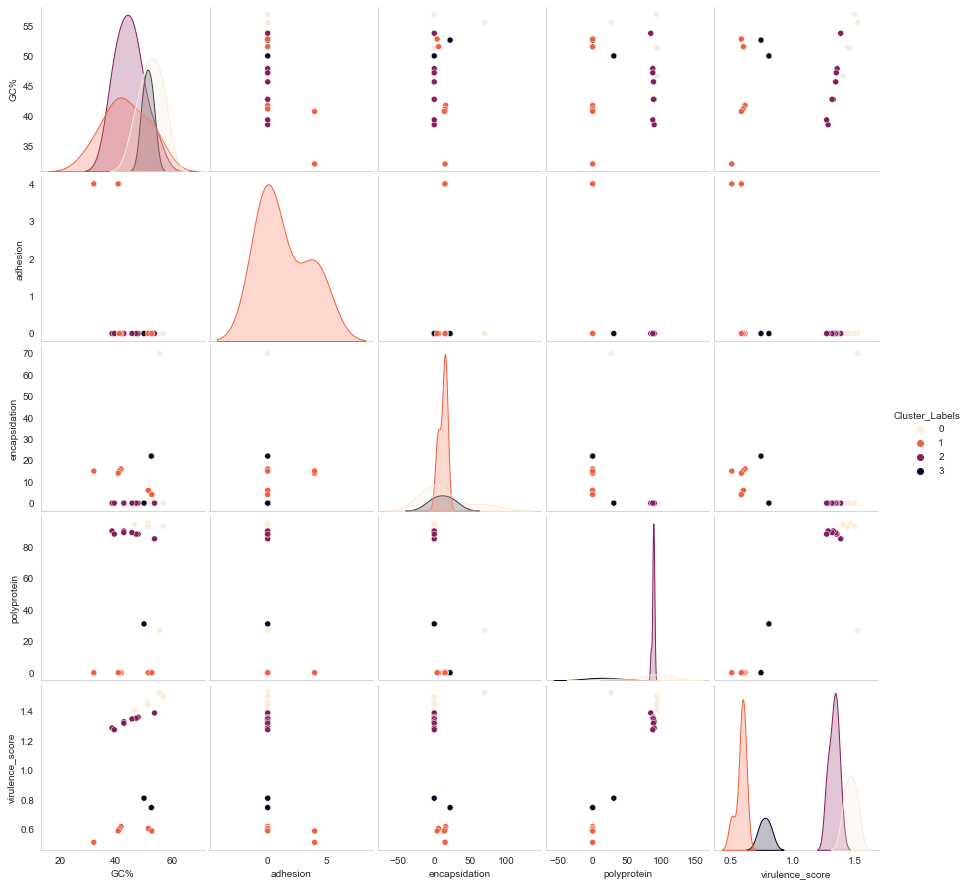

In [79]:
plt.figure(figsize=[12, 8], dpi=300)
data=init_df[['GC%','adhesion','encapsidation','polyprotein','virulence_score', 'Cluster_Labels']]
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(data, hue='Cluster_Labels',palette='rocket_r')

In [82]:
plt.savefig('Clustering.png', transparent=False)

<Figure size 432x288 with 0 Axes>

In [86]:
raw = data[['GC%','adhesion','encapsidation','polyprotein','virulence_score']] 
scaler = StandardScaler()
raw_scaled = scaler.fit_transform(raw)

C:\Users\hbalcera\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


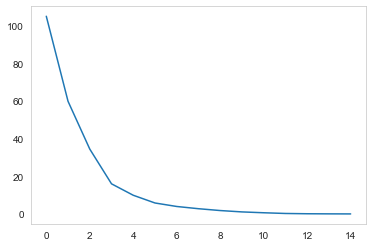

In [87]:
model = KMeans(n_clusters=8, n_init=15, random_state=42)
model.fit(raw_scaled)
cluster_labels = model.predict(raw_scaled)   

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(raw_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [90]:
for seed in list(np.arange(2,105,7)):
    kmeans = KMeans(n_clusters=3, random_state=seed)
    kmeans.fit(raw_scaled)
    cluster_labels = kmeans.predict(raw_scaled)   
    silhouette_avg = silhouette_score(raw_scaled, cluster_labels)
    calinski = metrics.calinski_harabasz_score(raw_scaled, cluster_labels)
    davies = davies_bouldin_score(raw_scaled, cluster_labels)
    print("For seed={0}, the silhouette is {1}, calinski is {2}, and davies is {3}".format(seed, silhouette_avg, calinski, davies))

For seed=2, the silhouette is 0.5565855525081769, calinski is 18.409084617210617, and davies is 0.729839981597166
For seed=9, the silhouette is 0.5565855525081769, calinski is 18.409084617210613, and davies is 0.7298399815971662
For seed=16, the silhouette is 0.5565855525081769, calinski is 18.409084617210613, and davies is 0.7298399815971662
For seed=23, the silhouette is 0.5565855525081769, calinski is 18.409084617210617, and davies is 0.729839981597166
For seed=30, the silhouette is 0.5565855525081769, calinski is 18.409084617210613, and davies is 0.7298399815971662
For seed=37, the silhouette is 0.5565855525081769, calinski is 18.409084617210613, and davies is 0.7298399815971662
For seed=44, the silhouette is 0.5565855525081769, calinski is 18.409084617210617, and davies is 0.729839981597166
For seed=51, the silhouette is 0.5565855525081769, calinski is 18.409084617210617, and davies is 0.729839981597166
For seed=58, the silhouette is 0.5565855525081769, calinski is 18.409084617210

In [91]:
for cluster in list(np.arange(2,15)):
    kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=15)
    kmeans.fit(raw_scaled)
    cluster_labels = kmeans.predict(raw_scaled)   
    silhouette_avg = silhouette_score(raw_scaled, cluster_labels)
    calinski = metrics.calinski_harabasz_score(raw_scaled, cluster_labels)
    davies = davies_bouldin_score(raw_scaled, cluster_labels)
    print("For cluster={0}, the silhouette is {1}, calinski is {2}, and davies is {3}".format(cluster, silhouette_avg, calinski, davies))

For cluster=2, the silhouette is 0.4773108746917484, calinski is 14.334238266304972, and davies is 0.953240194570796
For cluster=3, the silhouette is 0.5565855525081769, calinski is 18.409084617210617, and davies is 0.729839981597166
For cluster=4, the silhouette is 0.5872361858831121, calinski is 31.44707619254759, and davies is 0.45550909947632817
For cluster=5, the silhouette is 0.5225107197625694, calinski is 38.92357499050562, and davies is 0.45157212817340203
For cluster=6, the silhouette is 0.5404942854054976, calinski is 50.756198356274446, and davies is 0.39820596032923117
For cluster=7, the silhouette is 0.5487853838508332, calinski is 58.86586776363898, and davies is 0.38966551057228127
For cluster=8, the silhouette is 0.526764131883436, calinski is 67.27980992443698, and davies is 0.36228482152339014
For cluster=9, the silhouette is 0.4688610895401341, calinski is 83.85673925730406, and davies is 0.3148003692879786
For cluster=10, the silhouette is 0.48187121579321984, cali

In [92]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=15)
kmeans.fit(raw_scaled)
cluster_labels = kmeans.predict(raw_scaled)   
silhouette_avg = silhouette_score(raw_scaled, cluster_labels)
calinski = metrics.calinski_harabasz_score(raw_scaled, cluster_labels)
davies = davies_bouldin_score(raw_scaled, cluster_labels)

raw_df = raw
raw['Cluster_Labels'] = cluster_labels
raw['Cluster_Labels'].value_counts()

0    12
2     6
1     2
3     1
Name: Cluster_Labels, dtype: int64

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rawdf_minmax = scaler.fit_transform(raw)

rawdf_minmax = pd.DataFrame(rawdf_minmax, index=raw.index, columns=raw.columns)

rawdf_minmax['Cluster_Labels'] = cluster_labels

rawdf_clusters = rawdf_minmax.set_index("Cluster_Labels")
rawdf_clusters = rawdf_clusters.groupby("Cluster_Labels").mean().reset_index()
rawdf_clusters

,Cluster_Labels,GC%,adhesion,encapsidation,polyprotein,virulence_score
0,0,0.602319,0.0,0.000000,0.949123,0.849154
1,1,0.175403,1.0,0.207143,0.000000,0.037968
2,2,0.654167,0.0,0.150000,0.054386,0.148488
3,3,0.943548,0.0,1.000000,0.284211,1.000000


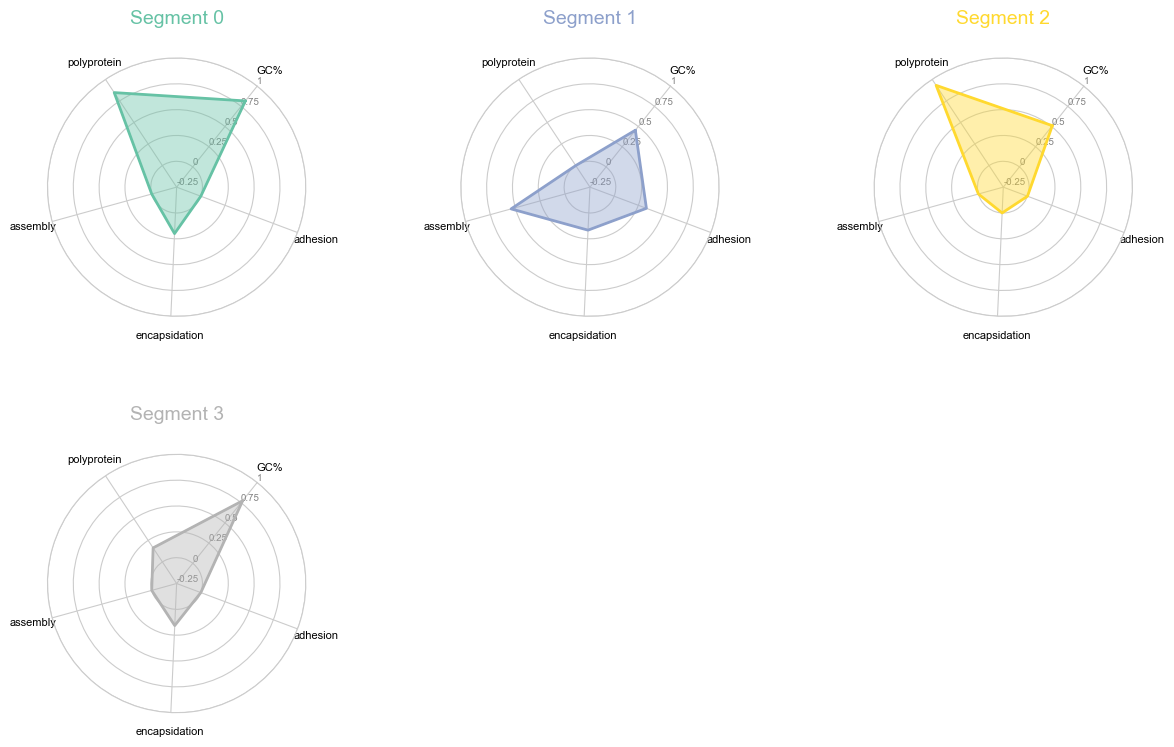

In [94]:
my_dpi=100
figz=plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5,wspace=0.6)
my_palette = plt.cm.get_cmap("Set2", len(rawdf_clusters.index))
figz.patch.set_facecolor('white')

for row in range(0, len(rawdf_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(rawdf_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hbalcera\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

<Figure size 3600x2400 with 0 Axes>

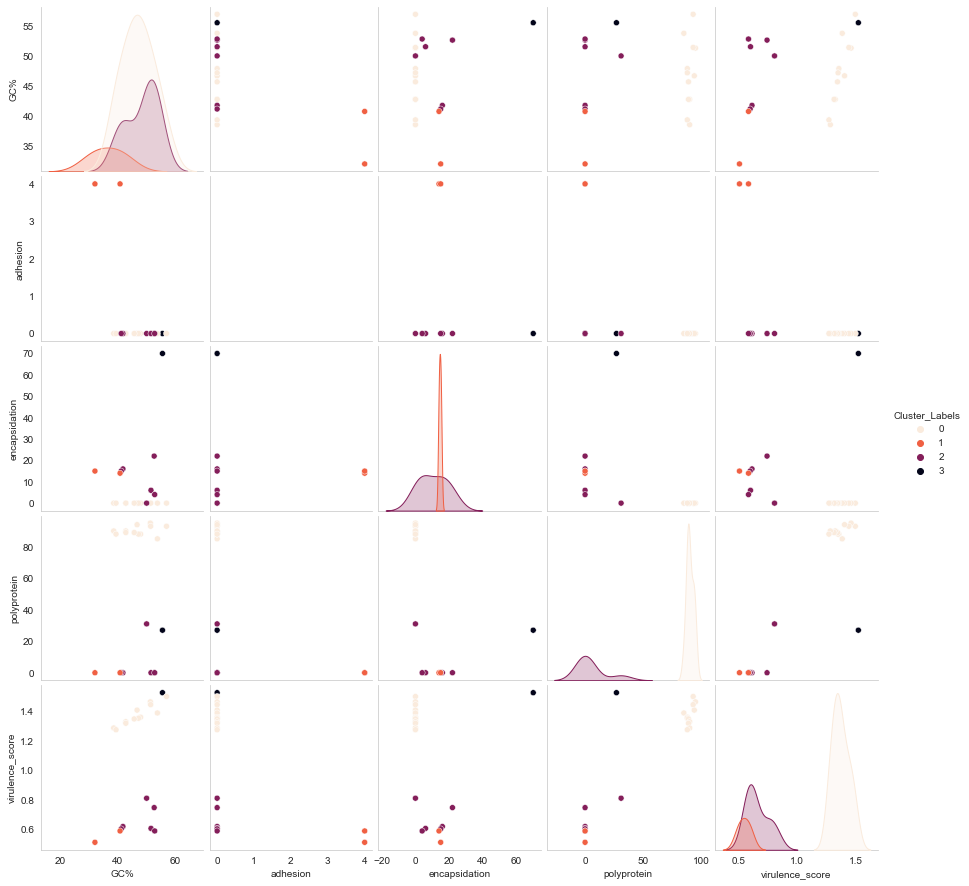

In [96]:
plt.figure(figsize=[12, 8], dpi=300)
data=raw[['GC%','adhesion','encapsidation','polyprotein','virulence_score', 'Cluster_Labels']]
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(data, hue='Cluster_Labels',palette='rocket_r')